Reference: https://github.com/enakai00/jupyter_tfbook

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

In [5]:
mnist = input_data.read_data_sets('./tmp/data/', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./tmp/data/t10k-images-idx3-ubyte.gz
Extracting ./tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [6]:
images, labels = mnist.train.next_batch(10)

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


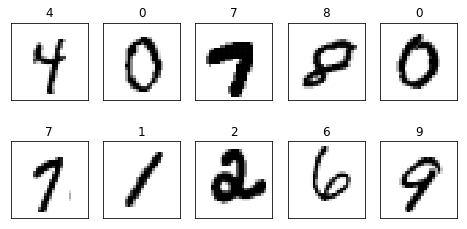

In [7]:
fig = plt.figure(figsize=(8,4))
for c, (image, label) in enumerate(zip(images, labels)):
    print(label)
    subplot = fig.add_subplot(2,5,c+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('{}'.format(np.argmax(label)))
    subplot.imshow(image.reshape((28,28)), vmin=0, vmax=1, cmap=plt.cm.gray_r, interpolation='nearest')

$$
\boldsymbol{x_n}=(x_{1n}, x_{2n},\dots,x_{Mn})
$$

$$
\boldsymbol{X} =
\begin{pmatrix}
      x_{11} & x_{21} & \dots & x_{M1} \\
      x_{12} & x_{22} & \dots & x_{M2} \\
      \vdots & \vdots & \vdots & \vdots \\
      x_{1N} & x_{2N} & \dots & x_{MN}      
\end{pmatrix}
$$

$$
\boldsymbol{W} =
\begin{pmatrix}
      w_{11} & w_{12} & \dots & w_{1K} \\
      w_{21} & w_{22} & \dots & w_{2K} \\
      \vdots & \vdots & \vdots & \vdots \\
      w_{M1} & w_{M2} & \dots & w_{MK}      
\end{pmatrix}
$$

$$
\boldsymbol{w} =
\begin{pmatrix}
      w_{01} , w_{02} , \dots , w_{0K}
\end{pmatrix}
$$

$$ \boldsymbol{F} = \boldsymbol{X} \boldsymbol{W} \oplus \boldsymbol{w} $$

$$ \boldsymbol{F} = \begin{pmatrix}
      f_1(\boldsymbol{x_1}) & f_2(\boldsymbol{x_1}) & \dots & f_K(\boldsymbol{x_1}) \\
      f_1(\boldsymbol{x_2}) & f_2(\boldsymbol{x_2}) & \dots & f_K(\boldsymbol{x_1}) \\
      \vdots   & \vdots   & \vdots & \vdots   \\
      f_1(\boldsymbol{x_N}) & f_2(\boldsymbol{x_N}) & \dots & f_K(\boldsymbol{x_N}) \\      
\end{pmatrix}
$$

$$
P_k(\boldsymbol{x_n}) = \frac{e^{f_k}(\boldsymbol{x_n})}{\sum_{k'=1}^{K} e^{f_k'}(\boldsymbol{x_n})}
$$

$$
\boldsymbol{P} = tf.nn.softmax(\boldsymbol{F})
$$

$$
\boldsymbol{X} = (x_1 x_2 \dots x_M)
$$

$$
\boldsymbol{P} = (P_1(\boldsymbol{x}) P_2(\boldsymbol{x}) \dots  P_K(\boldsymbol{x}))
$$

$$
\boldsymbol{t_n} = (0, \dots,0,1,0,\dots,0)
$$

$$
\boldsymbol{t_n} = (t_{1n}, t_{2n}, \dots, t_{Kn})
$$

In [8]:
import tensorflow as tf

np.random.seed(20180731)

In [11]:
x = tf.placeholder(tf.float32, [None, 784])
w = tf.Variable(tf.zeros([784, 10]))
w0 = tf.Variable(tf.zeros([10]))
f = tf.matmul(x, w) + w0
p = tf.nn.softmax(f)

In [14]:
t = tf.placeholder(tf.float32, {None, 10})
loss = -tf.reduce_sum(t * tf.log(p))
train_step = tf.train.AdamOptimizer().minimize(loss)

In [15]:
correct_prediction = tf.equal(tf.argmax(p, 1), tf.argmax(t, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [25]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [26]:
i = 0
for _ in range(2000):
    i += 1
    batch_xs, batch_ts = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x:batch_xs, t:batch_ts})
    if i % 100 == 0:
        loss_val, acc_val = sess.run([loss, accuracy], feed_dict={x:mnist.test.images, t: mnist.test.labels})
        print('Step: {}, Loss: {}, Accuracy: {}'.format(i, loss_val, acc_val))

Step: 100, Loss: 7563.662109375, Accuracy: 0.8436999917030334
Step: 200, Loss: 5353.6142578125, Accuracy: 0.8765000104904175
Step: 300, Loss: 4528.32568359375, Accuracy: 0.8927000164985657
Step: 400, Loss: 4094.16748046875, Accuracy: 0.8960999846458435
Step: 500, Loss: 3791.236572265625, Accuracy: 0.9027000069618225
Step: 600, Loss: 3579.49853515625, Accuracy: 0.9056000113487244
Step: 700, Loss: 3445.02783203125, Accuracy: 0.9089000225067139
Step: 800, Loss: 3341.72216796875, Accuracy: 0.9111999869346619
Step: 900, Loss: 3261.2314453125, Accuracy: 0.9136000275611877
Step: 1000, Loss: 3175.49169921875, Accuracy: 0.9126999974250793
Step: 1100, Loss: 3111.556884765625, Accuracy: 0.9143000245094299
Step: 1200, Loss: 3084.17041015625, Accuracy: 0.9143999814987183
Step: 1300, Loss: 3029.2392578125, Accuracy: 0.9151999950408936
Step: 1400, Loss: 2985.838134765625, Accuracy: 0.9164000153541565
Step: 1500, Loss: 2963.541015625, Accuracy: 0.9185000061988831
Step: 1600, Loss: 2923.562255859375, A

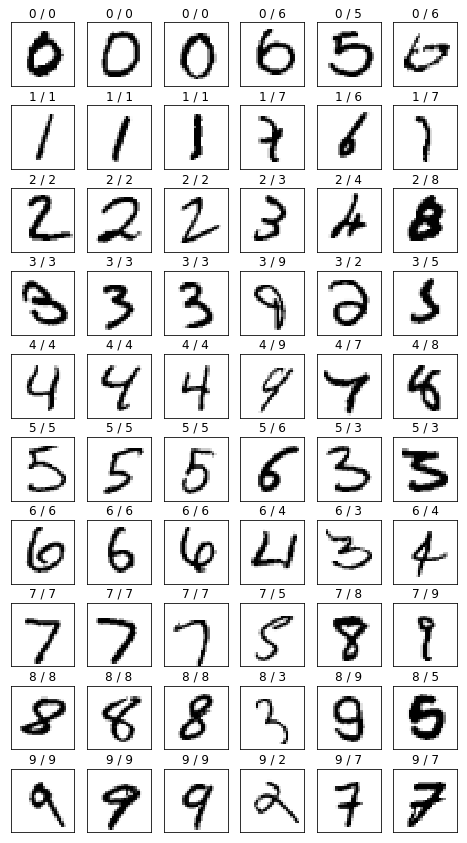

In [30]:
images, labels = mnist.test.images, mnist.test.labels
p_val = sess.run(p, feed_dict={x:images, t:labels})

fig = plt.figure(figsize=(8,15))
for i in range(10):
    c = 1
    for (image, label, pred) in zip(images, labels, p_val):
        prediction, actual = np.argmax(pred), np.argmax(label)
        if prediction != i:
            continue
        if (c < 4 and i == actual) or (c >= 4 and i != actual):
            subplot = fig.add_subplot(10,6,i*6+c)
            subplot.set_xticks([])
            subplot.set_yticks([])
            subplot.set_title('{} / {}'.format(prediction ,actual))
            subplot.imshow(image.reshape(28,28), vmin=0, vmax=1, cmap=plt.cm.gray_r, interpolation="nearest")
            c += 1
            if c > 6:
                break